# Task 02: NLP – Text Classification & Sentiment Analysis

## Objective

Build a **robust sentiment analysis pipeline** to classify customer reviews as **Positive (1)** or **Negative (0)**. You will benchmark **multiple modeling strategies** and recommend the best approach for deployment.

The product team is unsure whether **traditional frequency‑based methods (TF‑IDF)** or **modern semantic embeddings (Word2Vec / GloVe)** perform better on real customer reviews. Your task is to **experiment, compare, and justify.**

## Scenario

Great job completing the previous module on text representation. Now, ShopSense wants
to move from representation to a **real‑world classification system.**

You must: 

- Train and evaluate **6 different models**
- Compare statistical vs semantic features
- Design and visualize the **end‑to‑end system architecture** for engineers

## Part 1: System Architecture (Design First)


![Sentiment Architecture](architecture.png)

## Provided Dataset (Use Exactly as Given)
Create a **Pandas DataFrame** using the following data. Do not add, remove, or modify
samples.


In [1]:
data = [
 ("I absolutely love this product, it works perfectly!", 1),
 ("The quality is terrible and it broke after one day.", 0),
 ("Great value for money, highly recommended.", 1),
 ("I am very disappointed with the customer service.", 0),
 ("Fast delivery and the item matches the description.", 1),
 ("Worst purchase I have ever made, do not buy.", 0),
 ("The battery life is amazing, lasts all day.", 1),
 ("It stopped working within a week, very frustrating.", 0),
 ("The design is sleek and modern, looks great.", 1),
 ("Too expensive for such poor quality.", 0),
 ("Easy to use and set up, very user-friendly.", 1),
 ("The instructions were confusing and unhelpful.", 0),
 ("Customer support was very helpful and resolved my issue.", 1),
 ("The package arrived damaged and open.", 0),
 ("I would definitely buy this again, 5 stars!", 1),
 ("Not what I expected, the color is totally different.", 0),
 ("Performance is top-notch, exceeds expectations.", 1),
 ("Glitchy and slow, distinct lack of optimization.", 0),
 ("A fantastic addition to my daily routine.", 1),
 ("Complete waste of money, I want a refund.", 0),
 ("Satisfied with the purchase, good durability.", 1),
 ("The interface is cluttered and hard to navigate.", 0),
 ("Impressive sound quality for the price.", 1),
 ("It overheats quickly and becomes unusable.", 0),
 ("Smooth experience, no bugs found so far.", 1),
 ("Horrible experience, the app keeps crashing.", 0),
 ("Compact and lightweight, perfect for travel.", 1),
 ("Missing parts in the box, very careless.", 0),
 ("Best investment I made this year.", 1),
 ("Support team was rude and unhelpful.", 0),
 ("The packaging was eco-friendly and secure.", 1),
 ("Buttons feel cheap and wobbly.", 0),
 ("Works flawlessly on Linux systems.", 1),
 ("Software update bricked the device.", 0),
 ("Incredible bass for such small speakers.", 1),
 ("The screen scratches way too easily.", 0),
 ("Connecting to Bluetooth is a nightmare.", 0),
 ("Solid build quality, feels premium in hand.", 1),
 ("Delivery was delayed by two weeks.", 0),
 ("Very responsive touch screen.", 1),
 ("The subscription fee is hidden, very scammy.", 0),
 ("Helped me organize my work efficiently.", 1),
 ("The material causes skin irritation.", 0),
 ("Colors are vibrant and true to the pictures.", 1),
 ("The app asks for too many unnecessary permissions.", 0),
 ("Documentation is clear and concise.", 1),
 ("Constantly disconnects from Wi-Fi.", 0),
 ("Charging speed is incredibly fast.", 1),
 ("Received the wrong item twice.", 0),
 ("Highly customizable settings.", 1),
 ("Ads pop up every 5 seconds, annoying.", 0),
 ("The zoom feature on the camera is blurry.", 0)
]

## Part 2: Preprocessing


1. Convert the dataset into a Pandas DataFrame
2. Apply text preprocessing:
    - Lowercasing
    - Punctuation removal
    - Stopword removal
3. Split the dataset:
    - Train/Test split = 80% / 20% (strictly)

In [2]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.DataFrame(data, columns=['Reviews','Positive/Negative'])
df.head()

,Reviews,Positive/Negative
0,"I absolutely love this product, it works perfe...",1
1,The quality is terrible and it broke after one...,0
2,"Great value for money, highly recommended.",1
3,I am very disappointed with the customer service.,0
4,Fast delivery and the item matches the descrip...,1


In [4]:
def pre_process(text):
    text= text.lower()
    return text.translate(str.maketrans('','',string.punctuation))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
X_train,X_test,y_train,y_test = train_test_split(df['Reviews'],df['Positive/Negative'],test_size=0.2,random_state=42)

### Part 3: Feature Engineering & Model Benchmarking
You must train **6 distinct models** using different feature representations

### **A.** TF‑IDF (Statistical Representation)
Train the following models using **TF‑IDF features**:

In [6]:
TF_IDF = TfidfVectorizer(stop_words='english',preprocessor=pre_process,ngram_range=(1,2))

In [7]:
X_train = TF_IDF.fit_transform(X_train)
X_test = TF_IDF.transform(X_test)

In [8]:
TF_IDF.get_feature_names_out()

array(['absolutely', 'absolutely love', 'addition', 'addition daily',
       'amazing', 'amazing lasts', 'app', 'app asks', 'app keeps', 'asks',
       'asks unnecessary', 'bass', 'bass small', 'battery',
       'battery life', 'best', 'best investment', 'bluetooth',
       'bluetooth nightmare', 'blurry', 'box', 'box careless', 'bricked',
       'bricked device', 'broke', 'broke day', 'bugs', 'bugs far',
       'build', 'build quality', 'buttons', 'buttons feel', 'buy',
       'buy stars', 'camera', 'camera blurry', 'careless', 'causes',
       'causes skin', 'cheap', 'cheap wobbly', 'clear', 'clear concise',
       'cluttered', 'cluttered hard', 'color', 'color totally', 'compact',
       'compact lightweight', 'concise', 'confusing',
       'confusing unhelpful', 'connecting', 'connecting bluetooth',
       'constantly', 'constantly disconnects', 'crashing', 'customizable',
       'customizable settings', 'daily', 'daily routine', 'day',
       'definitely', 'definitely buy', 'delay

### Model 1: Multinomial Naive Bayes

In [9]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [10]:
y_pred = model.predict(X_test)

In [11]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.5455
[[4 2]
 [3 2]]
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.50      0.40      0.44         5

    accuracy                           0.55        11
   macro avg       0.54      0.53      0.53        11
weighted avg       0.54      0.55      0.54        11



### Model 2: Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
model_LR= LogisticRegression()
model_LR.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.5455
[[4 2]
 [3 2]]
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.50      0.40      0.44         5

    accuracy                           0.55        11
   macro avg       0.54      0.53      0.53        11
weighted avg       0.54      0.55      0.54        11



### Model 3: Support Vector Machine (SVC)

In [14]:
from sklearn.svm import SVC
model = SVC(kernel="linear")
model.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.5455
[[4 2]
 [3 2]]
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.50      0.40      0.44         5

    accuracy                           0.55        11
   macro avg       0.54      0.53      0.53        11
weighted avg       0.54      0.55      0.54        11



### **B.** Word2Vec (Custom Semantic Representation)
- Train (or load) a Word2Vec model on the training data
- Create average sentence vectors

### Model 4: Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.5455
[[5 1]
 [4 1]]
              precision    recall  f1-score   support

           0       0.56      0.83      0.67         6
           1       0.50      0.20      0.29         5

    accuracy                           0.55        11
   macro avg       0.53      0.52      0.48        11
weighted avg       0.53      0.55      0.49        11



### Model 5: Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.5455
[[4 2]
 [3 2]]
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.50      0.40      0.44         5

    accuracy                           0.55        11
   macro avg       0.54      0.53      0.53        11
weighted avg       0.54      0.55      0.54        11



### **C.** GloVe (Pre‑trained Semantic Representation)
- Load a pre‑trained GloVe model
(e.g., glove‑twitter‑25 or glove‑wiki‑gigaword‑50)
- Represent each sentence by averaging word vectors

Model:
- **Model 6**: Logistic Regression

In [20]:
import gensim.downloader as api
glove_model = api.load("glove-wiki-gigaword-50")

In [21]:
def vectorization(data):
    sentence_vector,y = [],[]
    for text,label in data:
        tokens = pre_process(text).split()
        vectors = [glove_model[words] for words in tokens if words in glove_model]
        if len(vectors)>0:
            vec = np.mean(vectors,axis=0)
        else:
            vec = np.zeros(glove_model.vector_size)
        sentence_vector.append(vec)
        y.append(label)
    return np.array(sentence_vector),y

In [22]:
import numpy as np

def vectorization(sentences):
    sentence_vectors = []
    y = []
    for text,label in sentences:
        tokens = pre_process(text).split()
        word_vectors = [glove_model[word] for word in tokens if word in glove_model]

        if len(word_vectors) > 0:
            sentence_vec = np.mean(word_vectors, axis=0)
        else:
            sentence_vec = np.zeros(glove_model.vector_size)

        sentence_vectors.append(sentence_vec)
        y.append(label)

    return np.array(sentence_vectors),y

In [23]:
X,y = vectorization(data)

In [24]:
X.shape

(52, 50)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.8182
[[5 1]
 [1 4]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.80      0.80      0.80         5

    accuracy                           0.82        11
   macro avg       0.82      0.82      0.82        11
weighted avg       0.82      0.82      0.82        11



## Part 4: Evaluation & Comparison

**Comparison table** with the following structure:

| Model Name             | Feature Type | Accuracy |
|------------------------|--------------|----------|
| Naive Bayes            | TF-IDF       | 54.55    |
| Logistic Regression    | TF-IDF       | 54.55    |
| SVM                    | TF-IDF       | 54.55    |
| Random Forest          | Word2Vec     | 54.55    |
| Logistic Regression    | Word2Vec     | 54.55    |
| Logistic Regression    | GloVe        | 81.82    |

Visualization
- Plot a **bar chart** comparing the accuracy of all 6 models

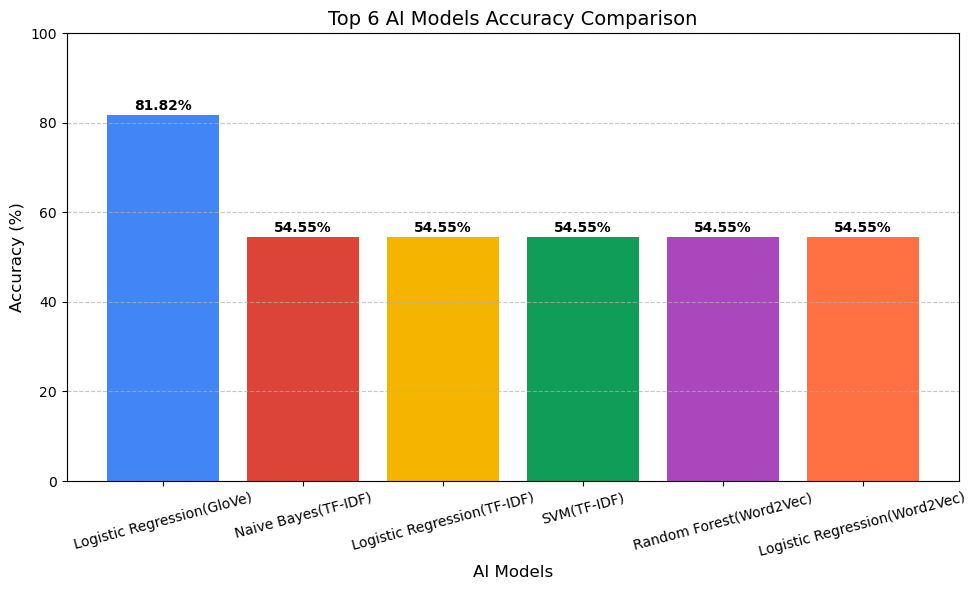

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Model': ['Naive Bayes(TF-IDF)', 'Logistic Regression(TF-IDF)', 'SVM(TF-IDF)', 'Random Forest(Word2Vec)', 'Logistic Regression(Word2Vec)', 'Logistic Regression(GloVe)'],
    'Accuracy (%)': [54.55, 54.55, 54.55, 54.55, 54.55, 81.82]
}

df = pd.DataFrame(data)
df = df.sort_values(by='Accuracy (%)', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Model'], df['Accuracy (%)'], color=['#4285F4', '#DB4437', '#F4B400', '#0F9D58', '#AB47BC', '#FF7043'])

# Adding labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval}%", ha='center', fontweight='bold')

plt.title('Top 6 AI Models Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('AI Models', fontsize=12)
plt.ylim(0, 100)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Part 5: Final Analysis (Required – ~200 Words)

Answer the following:

1. **TF‑IDF vs Embeddings**
\
    Did TF‑IDF outperform Word2Vec/GloVe on this small dataset? Why or why not?

2. **GloVe vs Trained Word2Vec**
\
   Did pre‑trained embeddings help capture words your Word2Vec missed?

3. **Architecture Explanation**
\
    Briefly explain the flow of your system architecture diagram.

### Deliverables
- Architecture Diagram (embedded in notebook)
- Jupyter Notebook with all 6 models
- Accuracy comparison table
- Bar chart visualization
- Final written analysis

### Evaluation Focus
- Correct pipeline design
- Fair comparison between models
- Clean, well‑structured code
- Clear reasoning and explanations 